<a href="https://colab.research.google.com/github/tanisha0016/Comparitive-performance-study-of-different-clustering-algorithms/blob/main/Comparitive_clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
# Load dataset (Using Iris dataset as an example, replace with any UCI dataset)
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(dataset_url, names=columns)
data.drop(columns=['species'], inplace=True)  # Remove categorical column for clustering

In [3]:
# Data Preprocessing with multiple scalers
scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler()}
preprocessed_data = {}
for name, scaler in scalers.items():
    preprocessed_data[name] = scaler.fit_transform(data)

In [4]:

# Apply PCA (Optional for Visualization and Dimensionality Reduction)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(preprocessed_data['StandardScaler'])





In [5]:
# Define Clustering Algorithms with Unique Parameters
clustering_algorithms = {
    'K-Means (k=4)': KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300),
    'Hierarchical (k=4)': AgglomerativeClustering(n_clusters=4, linkage='ward'),
    'DBSCAN (eps=0.3)': DBSCAN(eps=0.3, min_samples=5)
}

# Evaluate Clustering Performance with Different Metrics
for name, algo in clustering_algorithms.items():
    if 'DBSCAN' in name:
        labels = algo.fit_predict(preprocessed_data['StandardScaler'])
    else:
        labels = algo.fit_predict(pca_data)

    # Compute evaluation metrics
    unique_labels = set(labels)
    silhouette = silhouette_score(pca_data, labels) if len(unique_labels) > 1 else -1
    davies_bouldin = davies_bouldin_score(pca_data, labels) if len(unique_labels) > 1 else -1

    print(f"\n{name} Clustering Performance:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")


K-Means (k=4) Clustering Performance:
Silhouette Score: 0.4470
Davies-Bouldin Index: 0.7388

Hierarchical (k=4) Clustering Performance:
Silhouette Score: 0.4603
Davies-Bouldin Index: 0.7105

DBSCAN (eps=0.3) Clustering Performance:
Silhouette Score: -0.1826
Davies-Bouldin Index: 2.1881


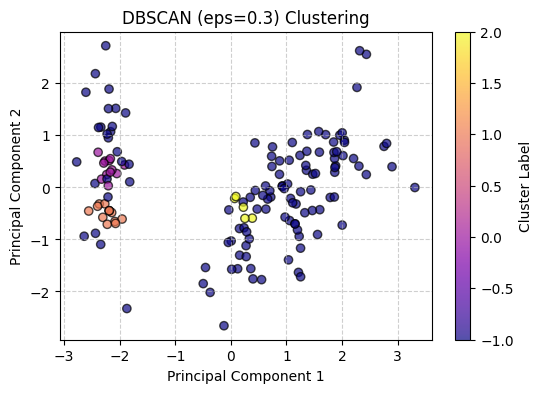

In [7]:
# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='plasma', alpha=0.7, edgecolors='k')
plt.title(f"{name} Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()